# Tesla Inc. Stock Prices Prediction

In [2]:
# Importing Plot Module
import plotly
import plotly.offline as py
import plotly.io as pio
import plotly.graph_objs as go
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [3]:
# Importing Libraries
from pandas_datareader import data
import math
import numpy as np
import pandas as pd
import datetime as dt
import urllib.request, json
import os
import tensorflow as tf 
from sklearn.preprocessing import MinMaxScaler
import pandas_datareader as web
from keras.models import Sequential
from keras.layers import Dense, LSTM

/usr/local/lib/python3.6/dist-packages/pandas_datareader/compat/__init__.py:7: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.

Using TensorFlow backend.


In [4]:
# Working with plotly offline
from plotly.offline import plot, iplot
plotly.offline.init_notebook_mode(connected=True)

In [5]:
# Setting renderers
pio.renderers
pio.renderers.default = 'colab'

## Get Data

In [6]:
tsla = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Stock Price Prediction/data_csv/TSLA-062810-070120.csv')
tsla.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
2515,2020-06-25,954.270020,985.979980,937.150024,985.979980,985.979980,9254500
2516,2020-06-26,994.780029,995.000000,954.869995,959.739990,959.739990,8854900
2517,2020-06-29,969.010010,1010.000000,948.520020,1009.349976,1009.349976,9026400
2518,2020-06-30,1006.500000,1087.689941,1003.729980,1079.810059,1079.810059,16918500
2519,2020-07-01,1083.000000,1135.329956,1080.500000,1119.630005,1119.630005,13198300


## Plot Close Price History

In [7]:
close = [go.Scatter(x= tsla.Date,
                    y= tsla.Close)]
py.iplot(close)

## Improving Visualization

In [8]:
data = close
interactive_layout = dict(
                          title= 'TESLA Close Prices',
                          title_x= 0.5,
                          xaxis= dict(
                              rangeselector= dict(
                                                  buttons= list([
                                                                 dict(count=1,
                                                                      label= '1m',
                                                                      step= 'month',
                                                                      stepmode= 'backward'),
                                                                 dict(count=3,
                                                                     label= '3m',
                                                                     step='month',
                                                                      stepmode= 'backward'),
                                                                 dict(count=6,
                                                                      label= '6m',
                                                                      step='month',
                                                                      stepmode= 'backward'),
                                                                 dict(step='all')
                                                                 ])
                                                  ),
                              rangeslider=dict(visible=True),
                              type='date'
                                      )
                           )
fig = dict(data= data, layout=interactive_layout)
py.iplot(fig)

## Select recent period

In [40]:
period = 252*8
df = tsla.iloc[-period:]
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
2515,2020-06-25,954.270020,985.979980,937.150024,985.979980,985.979980,9254500
2516,2020-06-26,994.780029,995.000000,954.869995,959.739990,959.739990,8854900
2517,2020-06-29,969.010010,1010.000000,948.520020,1009.349976,1009.349976,9026400
2518,2020-06-30,1006.500000,1087.689941,1003.729980,1079.810059,1079.810059,16918500
2519,2020-07-01,1083.000000,1135.329956,1080.500000,1119.630005,1119.630005,13198300


## Creating new DF with the column Close


In [41]:
# Creating DF with colum 'Close'
data = df.filter(['Close'])

# Covert DF to a numpy array
dataset = data.values

# Get the number of rows to train the module
training_data_len = math.ceil(len(dataset)*0.8)

training_data_len

1613

## Data Normalization

In [42]:
# Scale the Data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.00535879],
       [0.00485583],
       [0.0047461 ],
       ...,
       [0.89915226],
       [0.96358587],
       [1.        ]])

## Train Data

In [43]:
# Creating training dataset
# Creating the scaled trainig data set
train_data = scaled_data[0:training_data_len, :]

# Split the data between x and y train data sets
x_train = []
y_train = []

# Separete first 60 items for x_train and the 61 for y_train
for i in range(60,len(train_data)):
  x_train.append(train_data[i-60:i, 0])
  y_train.append(train_data[i, 0])

In [ ]:
train_data

### Convert to a numpy array

In [45]:
# Convert the x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

### Reshape Data

In [46]:
# Reshape de Data for 3 dimensions, once LSTM needs it
x_train = np.reshape(x_train,(x_train.shape[0], x_train.shape[1], 1))    # (num of samples/rows, time steps, features)
x_train.shape

(1553, 60, 1)

### Build LSTM model

In [47]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [48]:
# Compiling the model
model.compile(optimizer='adam', loss='mean_squared_error')

### Train model

In [49]:
# Train Model
model.fit(x_train, y_train, 
          batch_size=1,    # batch size: total number of training examples present in a single batch 
          epochs=1)        # epochs: number of iterations when an entire dataset is passed foward and backward through a neural network


    

Epoch 1/1
1553/1553 [==============================] - 64s 41ms/step - loss: 3.5926e-04


## Test Data

In [50]:
# Creating Test Data set
# Creating a new array containing scaled values from index 2519 to 2479
test_data = scaled_data[training_data_len -60 : , :]
#Creating the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len: , :]
for i in range(60, len(test_data)):
  x_test.append(test_data[i-60 : i, 0])

### Covert to a numpy array

In [51]:
#Convert data to numpy array
x_test = np.array(x_test)

### Rashape data

In [52]:
# Reshaping to 3 dimension
x_test = np.reshape(x_test,(x_test.shape[0], x_test.shape[1], 1))    # (num of samples/rows, time steps, features)
x_test.shape

(403, 60, 1)

### Get models prediction price values

In [53]:
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

### Get the Root Mean Squared Error

In [54]:
rmse = np.sqrt( np.mean(predictions - y_test)**2)
rmse

14.00028416243651

## Plot Result

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



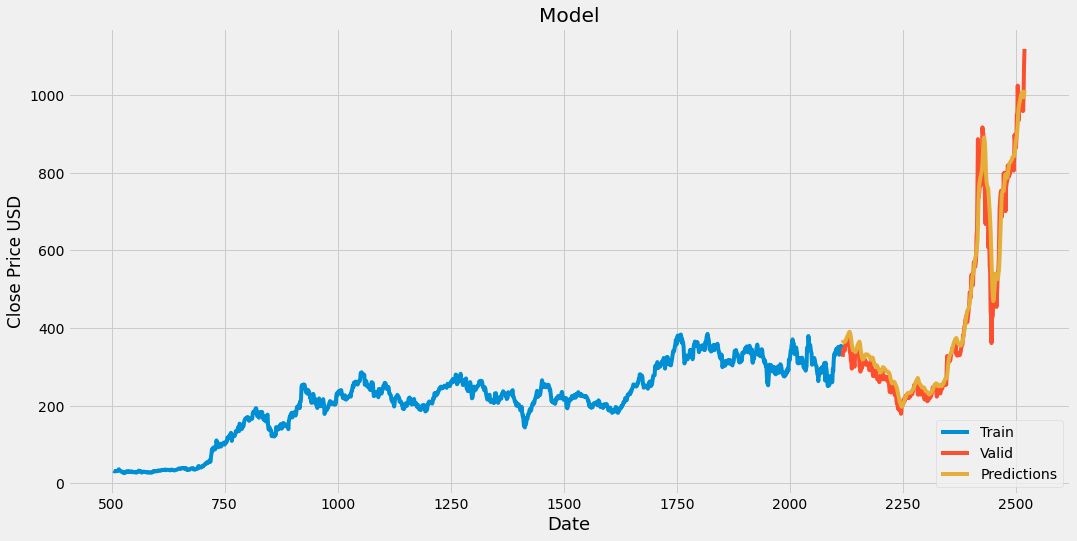

In [56]:
# Plot data
train = data[ : training_data_len]
valid = data[training_data_len : ]
valid['Predictions'] = predictions
# Visualize data
plt.figure(figsize= (16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD')

# Selecting Data
plt.plot(train['Close'])
plt.plot(valid[['Close','Predictions']])
plt.legend(['Train','Valid','Predictions'], loc='lower right')
plt.show()

## Trying to improve Prediction

In [61]:
period = 252*10
df = tsla.iloc[-period:]
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,19.000000,25.00,17.540001,23.889999,23.889999,18766300
1,2010-06-30,25.790001,30.42,23.299999,23.830000,23.830000,17187100
2,2010-07-01,25.000000,25.92,20.270000,21.959999,21.959999,8218800
3,2010-07-02,23.000000,23.10,18.709999,19.200001,19.200001,5139800
4,2010-07-06,20.000000,20.00,15.830000,16.110001,16.110001,6866900


### Get train and test data

In [62]:
# Creating DF with colum 'Close'
data = df.filter(['Close'])

# Covert DF to a numpy array
dataset = data.values

# Get the number of rows to train the module
training_data_len = math.ceil(len(dataset)*0.8)

training_data_len

2016

In [64]:
train_data = data[:training_data_len]
test_data = data[training_data_len:]

### Covert to a numpy array

In [66]:
# Convert the x_train and y_train to numpy arrays
train_data, test_data = np.array(train_data), np.array(test_data)

### Normalize Data

In [67]:
scaler = MinMaxScaler()
train_data = train_data.reshape(-1,1)
test_data = test_data.reshape(-1,1)

In [68]:
# Train the Scaler with training data and smooth data
smoothing_window_size = 500
for di in range(0,2000,smoothing_window_size):
    scaler.fit(train_data[di:di+smoothing_window_size,:])
    train_data[di:di+smoothing_window_size,:] = scaler.transform(train_data[di:di+smoothing_window_size,:])

# You normalize the last bit of remaining data
scaler.fit(train_data[di+smoothing_window_size:,:])
train_data[di+smoothing_window_size:,:] = scaler.transform(train_data[di+smoothing_window_size:,:])

In [69]:
# Reshape both train and test data
train_data = train_data.reshape(-1)

# Normalize test data
test_data = scaler.transform(test_data).reshape(-1)

In [71]:
# Now perform exponential moving average smoothing
# So the data will have a smoother curve than the original ragged data
EMA = 0.0
gamma = 0.1
for ti in range(training_data_len):
  EMA = gamma*train_data[ti] + (1-gamma)*EMA
  train_data[ti] = EMA

# Used for visualization and test purposes
all_mid_data = np.concatenate([train_data,test_data],axis=0)

In [72]:
window_size = 100
N = train_data.size
std_avg_predictions = []
std_avg_x = []
mse_errors = []

for pred_idx in range(window_size,N):

    if pred_idx >= N:
        date = dt.datetime.strptime(k, '%Y-%m-%d').date() + dt.timedelta(days=1)
    else:
        date = df.loc[pred_idx,'Date']

    std_avg_predictions.append(np.mean(train_data[pred_idx-window_size:pred_idx]))
    mse_errors.append((std_avg_predictions[-1]-train_data[pred_idx])**2)
    std_avg_x.append(date)

print('MSE error for standard averaging: %.5f'%(0.5*np.mean(mse_errors)))

MSE error for standard averaging: 0.01448


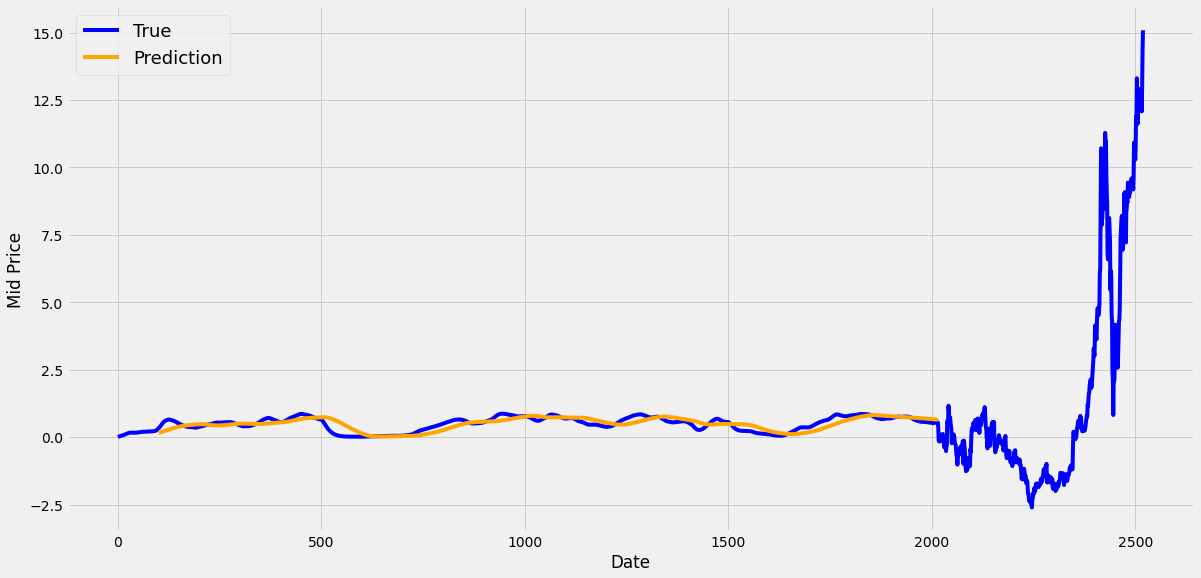

In [73]:
plt.figure(figsize = (18,9))
plt.plot(range(df.shape[0]),all_mid_data,color='b',label='True')
plt.plot(range(window_size,N),std_avg_predictions,color='orange',label='Prediction')
#plt.xticks(range(0,df.shape[0],50),df['Date'].loc[::50],rotation=45)
plt.xlabel('Date')
plt.ylabel('Mid Price')
plt.legend(fontsize=18)
plt.show()

In [74]:
window_size = 100
N = train_data.size

run_avg_predictions = []
run_avg_x = []

mse_errors = []

running_mean = 0.0
run_avg_predictions.append(running_mean)

decay = 0.5

for pred_idx in range(1,N):

    running_mean = running_mean*decay + (1.0-decay)*train_data[pred_idx-1]
    run_avg_predictions.append(running_mean)
    mse_errors.append((run_avg_predictions[-1]-train_data[pred_idx])**2)
    run_avg_x.append(date)

print('MSE error for EMA averaging: %.5f'%(0.5*np.mean(mse_errors)))

MSE error for EMA averaging: 0.00007


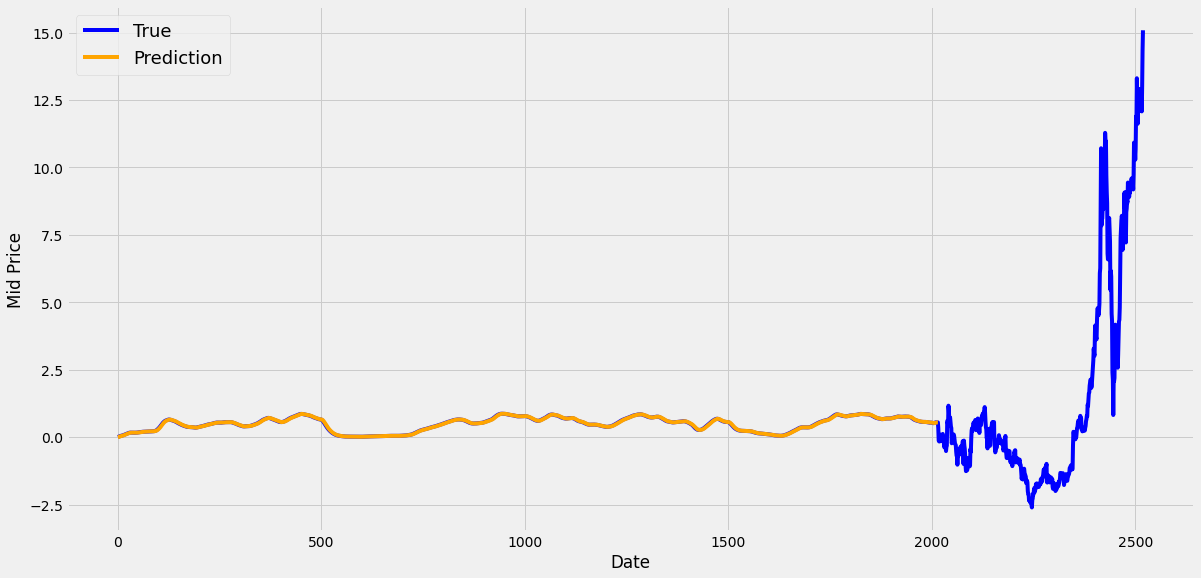

In [75]:
plt.figure(figsize = (18,9))
plt.plot(range(df.shape[0]),all_mid_data,color='b',label='True')
plt.plot(range(0,N),run_avg_predictions,color='orange', label='Prediction')
#plt.xticks(range(0,df.shape[0],50),df['Date'].loc[::50],rotation=45)
plt.xlabel('Date')
plt.ylabel('Mid Price')
plt.legend(fontsize=18)
plt.show()

In [77]:
D = 1 # Dimensionality of the data. Since your data is 1-D this would be 1
num_unrollings = 50 # Number of time steps you look into the future.
batch_size = 500 # Number of samples in a batch
num_nodes = [200,200,150] # Number of hidden nodes in each layer of the deep LSTM stack we're using
n_layers = len(num_nodes) # number of layers
dropout = 0.2 # dropout amount

#tf.reset_default_graph() # This is important in case you run this multiple times

In [ ]:
# Input data.
train_inputs, train_outputs = [],[]

# You unroll the input over time defining placeholders for each time step
for ui in range(num_unrollings):
    train_inputs.append(tf.placeholder(tf.float32, shape=[batch_size,D],name='train_inputs_%d'%ui))
    train_outputs.append(tf.placeholder(tf.float32, shape=[batch_size,1], name = 'train_outputs_%d'%ui))